In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns',500)
%matplotlib inline

In [14]:
df = pd.read_csv('data/WorldCupMatches.csv')

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(850, 20)

In [19]:
df.reset_index(drop=True,inplace=True)

In [21]:
df.sample(n=5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
331,1982.0,21 Jun 1982 - 21:00,Group 5,La Romareda,Zaragoza,Honduras,1.0,1.0,Northern Ireland,,15000.0,0.0,1.0,CHAN Thomson Tam Sun (HKG),LABO REVOREDO Enrique (PER),CASARIN Paolo (ITA),293.0,959.0,HON,NIR
119,1958.0,15 Jun 1958 - 19:00,Group 1,Malmo Stadion,Malm�,Germany FR,2.0,2.0,Northern Ireland,,21990.0,1.0,1.0,FERNANDES CAMPOS Joaquim (POR),AHLNER Sten (SWE),HELGE Leo (DEN),220.0,1389.0,FRG,NIR
701,2006.0,30 Jun 2006 - 21:00,Quarter-finals,"FIFA World Cup Stadium, Hamburg",Hamburg,Italy,3.0,0.0,Ukraine,,50000.0,1.0,0.0,DE BLEECKERE Frank (BEL),HERMANS Peter (BEL),VROMANS Walter (BEL),97410300.0,97410058.0,ITA,UKR
661,2006.0,15 Jun 2006 - 15:00,Group A,"FIFA World Cup Stadium, Hamburg",Hamburg,Ecuador,3.0,0.0,Costa Rica,,50000.0,1.0,0.0,CODJIA Coffi (BEN),NTAGUNGIRA Celestin (RWA),ADERODJOU Aboudou (BEN),97410100.0,97410018.0,ECU,CRC
302,1978.0,21 Jun 1978 - 13:45,Group A,El Monumental - Estadio Monumental Antonio Ves...,Buenos Aires,Netherlands,2.0,1.0,Italy,,67433.0,0.0,1.0,MARTINEZ Angel (ESP),PESTARINO Luis (ARG),OROZCO GUERRERO Cesar (PER),279.0,2391.0,NED,ITA


In [22]:
varc = ['Home Team Goals',
 'Away Team Goals','Attendance',
 'Half-time Home Goals',
 'Half-time Away Goals']

In [24]:
X = df[varc].copy()

In [25]:
X.shape

(850, 5)

In [27]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE

In [29]:
sc = StandardScaler()
Xs = pd.DataFrame(sc.fit_transform(X),columns=varc)

In [32]:
sc = MinMaxScaler()
Xmm = pd.DataFrame(sc.fit_transform(X),columns=varc)

In [34]:
pca = PCA()
Xp = pd.DataFrame(pca.fit_transform(Xs),columns=['p%d'%(i+1) for i in range(len(varc))])

In [40]:
pca.explained_variance_ratio_.cumsum()

array([0.35477019, 0.69317545, 0.88488707, 0.94855478, 1.        ])

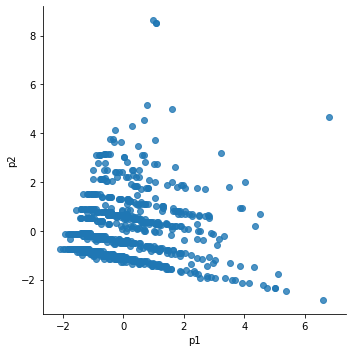

In [42]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

In [43]:
mds = MDS(n_components=2,n_jobs=-1)
tsne = TSNE(n_components=2,n_jobs=-1)

In [44]:
%%time
Xm = pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

CPU times: user 118 ms, sys: 139 ms, total: 257 ms
Wall time: 18.3 s


In [45]:
%%time
Xt = pd.DataFrame(tsne.fit_transform(Xmm),columns=['d1','d2'])

CPU times: user 17.3 s, sys: 23.3 ms, total: 17.3 s
Wall time: 5.58 s


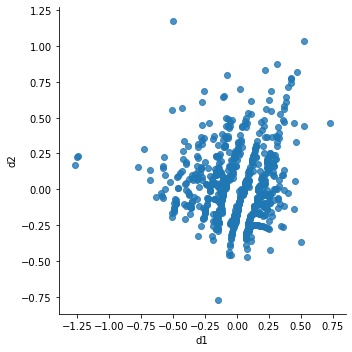

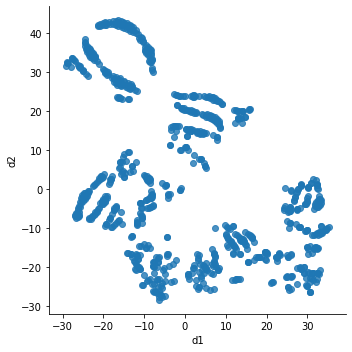

In [46]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)
sns.lmplot(data=Xt,x='d1',y='d2',fit_reg=False)

In [47]:
from sklearn.mixture import GaussianMixture

In [48]:
gmm = GaussianMixture(n_components=5)

In [49]:
gmm.fit(Xmm)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [58]:
gmm.means_

array([[0.11494842, 0.08433036, 0.25116061, 0.04683779, 0.        ],
       [0.06618299, 0.43684536, 0.2746388 , 0.0536224 , 0.31822839],
       [0.34040205, 0.07184562, 0.27070982, 0.27494859, 0.        ],
       [0.1873149 , 0.14285714, 0.24127125, 0.12064782, 0.2       ],
       [0.29496572, 0.30973404, 0.20190247, 0.21930461, 0.25655078]])

In [59]:
gmm.covariances_

array([[[ 9.46138442e-03,  3.64077148e-03, -8.53912653e-04,
          2.51228336e-03,  0.00000000e+00],
        [ 3.64077148e-03,  1.29656946e-02, -3.09789332e-04,
         -6.85888953e-04,  0.00000000e+00],
        [-8.53912653e-04, -3.09789332e-04,  1.51535387e-02,
         -1.21965878e-03,  0.00000000e+00],
        [ 2.51228336e-03, -6.85888953e-04, -1.21965878e-03,
          5.66059146e-03,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  1.00000000e-06]],

       [[ 4.78939871e-03,  2.25574122e-03, -4.66432275e-04,
          3.47492680e-03,  1.63234286e-03],
        [ 2.25574122e-03,  2.62828431e-02, -1.14781888e-03,
          4.22946491e-04,  1.86945504e-02],
        [-4.66432275e-04, -1.14781888e-03,  9.34519819e-03,
          2.92703177e-04,  9.98735344e-04],
        [ 3.47492680e-03,  4.22946491e-04,  2.92703177e-04,
          6.07085842e-03, -2.12051815e-03],
        [ 1.63234286e-03,  1.86945504e-02,  9.98735344e-04,
  

In [60]:
gmm.weights_

array([0.46255296, 0.09776628, 0.1914441 , 0.15764524, 0.09059142])

In [61]:
gmm.n_iter_

12

In [62]:
df['cl'] = X['cl'] = Xp['cl'] = Xm['cl']  = Xt['cl'] =gmm.predict(Xmm)

In [68]:
df.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,cl
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,2
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,2


In [65]:
pd.DataFrame(gmm.predict_proba(Xmm))

,0,1,2,3,4
0,2.548759e-07,2.741718e-12,0.999997,0.0,2.636850e-06
1,1.030160e-02,2.415344e-08,0.989698,0.0,4.577321e-09
2,1.501320e-02,4.716773e-06,0.984888,0.0,9.434854e-05
3,6.223572e-01,9.475370e-08,0.377580,0.0,6.298870e-05
4,9.702625e-01,8.158313e-06,0.029729,0.0,7.102072e-08
...,...,...,...,...,...
845,9.780180e-01,1.114490e-04,0.021870,0.0,1.071033e-07
846,0.000000e+00,1.000000e+00,0.000000,0.0,6.897285e-32
847,9.694613e-01,1.107962e-04,0.030428,0.0,1.094620e-07
848,0.000000e+00,9.989986e-01,0.000000,0.0,1.001421e-03


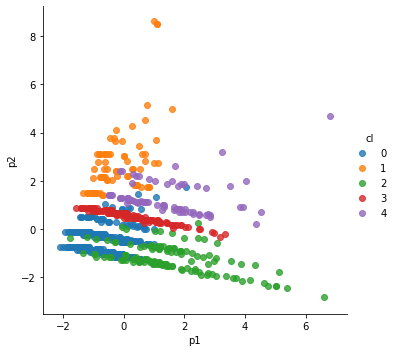

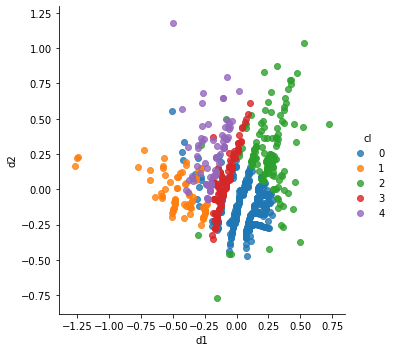

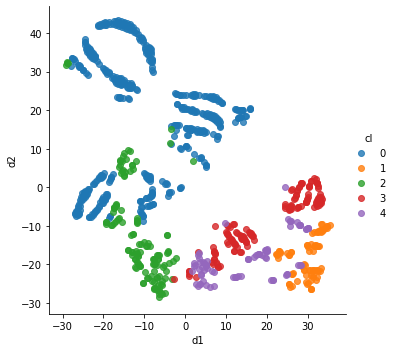

In [70]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='cl')
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False,hue='cl')
sns.lmplot(data=Xt,x='d1',y='d2',fit_reg=False,hue='cl')